In [1]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt
import cvxpy as cp
import pickle
# import gurobipy

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 1):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, save_file)

In [3]:
def plot_from_sim_paths_steps(file_name, steps = 10**5, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    Q_paths_M = np.asarray( M_res["Q_paths"] )
    C_paths_M = np.asarray( M_res["C_paths"] )
    Q_paths_B = np.asarray( B_res["Q_paths"] )
    C_paths_B = np.asarray( B_res["C_paths"] )
    QPM = Q_paths_M[:,0:steps]
    CPM = C_paths_M[:,0:steps]
    QPB = Q_paths_B[:,0:steps]
    CPB = C_paths_B[:,0:steps]
    (average_cost_M, average_queue_M) = utils.average_paths(CPM,QPM, frac)
    (average_cost_B, average_queue_B) = utils.average_paths(CPB,QPB, frac)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)
def comparison_plot(file_name, steps = 10**4, frac = 0):
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
        
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    fluid_sol = {'Cost':0}
    
    Q_paths_M = np.asarray( M_res["Q_paths"] )
    C_paths_M = np.asarray( M_res["C_paths"] )
    Q_paths_B = np.asarray( B_res["Q_paths"] )
    C_paths_B = np.asarray( B_res["C_paths"] )
    
    QPM = Q_paths_M[:,0:steps]
    CPM = C_paths_M[:,0:steps]
    QPB = Q_paths_B[:,0:steps]
    CPB = C_paths_B[:,0:steps]
    (avg_C_M, avg_Q_M) = utils.average_paths(CPM,QPM, frac)
    (avg_C_B, avg_Q_B) = utils.average_paths(CPB,QPB, frac)
    # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    
    plt.figure( figsize=(20,6) ) 
    plt.subplot(1,2,1)
    ylim = max( max( avg_Q_B ), max( avg_Q_M ) )
    plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
    # Batching data
    plt.plot(avg_C_B,avg_Q_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
    # Max Weight data
    plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
    plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
    plt.ylabel("Average queue length", weight='bold',fontsize=12)
    plt.xlabel("Average cost", weight='bold',fontsize=12)
    plt.title("Reduced steps", weight='bold',fontsize=15)
    plt.legend(['Fluid', 'Batching', 'Max-weight', 'c = 0 sol'])
    
    print("old MW", avg_C_M)
    print("old B", avg_C_B)
    
    (avg_C_M, avg_Q_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    (avg_C_B, avg_Q_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    plt.subplot(1,2,2)
    ylim = max( max( avg_Q_B ), max( avg_Q_M ) )
    plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
    # Batching data
    plt.plot(avg_C_B,avg_Q_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
    # Max Weight data
    plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
    plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
    plt.ylabel("Average queue length", weight='bold',fontsize=12)
    plt.xlabel("Average cost", weight='bold',fontsize=12)
    plt.title("Original", weight='bold',fontsize=15)
    plt.legend(['Fluid', 'Batching', 'Max-weight', 'c = 0 sol'])
    
    print("new MW", avg_C_M)
    print("new B", avg_C_B)
    
    plt.show()

Expected cost for c = 0 case: 0.92
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0xdfb4e2e3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 5e-01]
Presolve removed 1 rows and 1 columns
Presolve time: 0.02s
Presolved: 7 rows, 15 columns, 30 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0412536e-01   4.069200e-01   0.000000e+00      0s
       3    5.8941125e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.894112550e-01
Objective Value: 0.59
x:  [[0.01 0.1  0.15 0.24]
 [0.   0.1  0.   0.  ]
 [0.   0.   0.1  0.  ]
 [0.   0.   0.

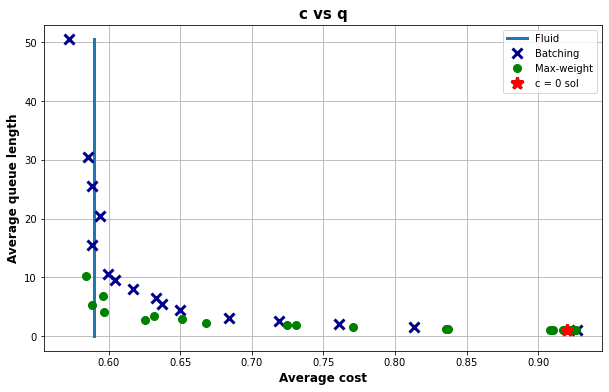

In [14]:
file_name = "../sim_paths_prob_curve9.pkl"
with open(file_name,'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)

In [15]:
print(W, pmf_cust, pmf_serv)

[[0.         1.         1.         1.41421356]
 [1.         0.         1.41421356 1.        ]
 [1.         1.41421356 0.         1.        ]
 [1.41421356 1.         1.         0.        ]] [0.5 0.1 0.1 0.3] [0.01 0.2  0.25 0.54]


Expected cost for c = 0 case: 0.92
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0xdfb4e2e3
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 5e-01]
Presolve removed 1 rows and 1 columns
Presolve time: 0.02s
Presolved: 7 rows, 15 columns, 30 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.0412536e-01   4.069200e-01   0.000000e+00      0s
       3    5.8941125e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.894112550e-01
Objective Value: 0.59
x:  [[0.01 0.1  0.15 0.24]
 [0.   0.1  0.   0.  ]
 [0.   0.   0.1  0.  ]
 [0.   0.   0.

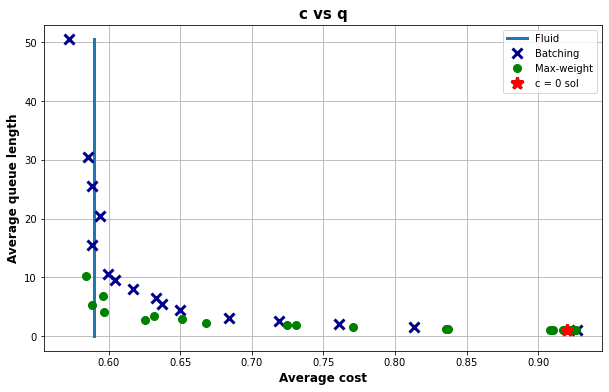

In [20]:
file_name = "../sim_paths_prob_curve9.pkl"
with open(file_name,'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
utils.qc_plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M)

In [4]:
def minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B):
    len_M = len(average_cost_M)
    len_B = len(average_cost_B)
    max_val = 0
    for i in range(len_M):
        shifted = np.abs(average_queue_B - average_queue_M[i])
        idx = shifted.argmin()
        if(max_val < average_cost_B[idx] - average_cost_M[i]):
            max_val = average_cost_B[idx] - average_cost_M[i]
            (cM,qM,cB,qB)= ( average_cost_M[i], average_queue_M[i], average_cost_B[idx], average_queue_B[idx] )
    return cM, qM, cB, qB

In [27]:
cM, qM, cB, qB = minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)
print(cM, qM, cB, qB)

0.6255789606480454 2.6889 0.7191472939388639 2.5


In [5]:
def plot(Ex, fluid_sol, avg_Q_B, avg_C_B, avg_Q_M, avg_C_M, cM, qM, cB, qB):
    plt.figure( figsize=(10,6) ) 

    # C = 0 Case
    # C = Inf/Fluid Case
    ylim = max( max( avg_Q_B ), max( avg_Q_M ) )
    plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
    # Batching data
    plt.plot(avg_C_B,avg_Q_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
    # Max Weight data
    plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
    plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
    # Batching data
    plt.plot([cB],[qB],'rx',markersize = 12, markeredgewidth=3)
    # Max Weight data
    plt.plot([cM],[qM],'ro',markersize = 10)

    plt.ylabel("Average queue length", weight='bold',fontsize=12)
    plt.xlabel("Average cost", weight='bold',fontsize=12)
    plt.title("c vs q", weight='bold',fontsize=15)
    plt.legend(['Fluid', 'Batching', 'Max-weight', 'c = 0 sol'])
    # plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
    plt.grid(True)
    plt.show()

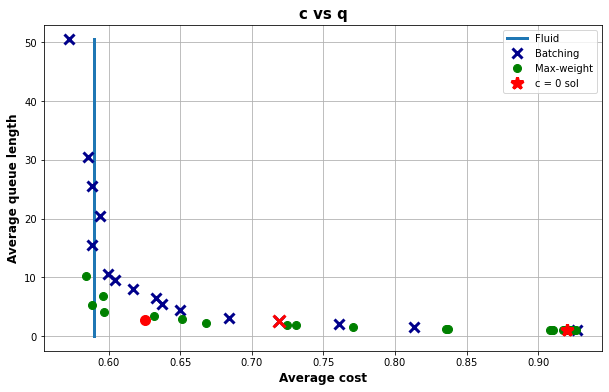

In [37]:
plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, cM, qM, cB, qB)

### Plot all 14 manually cuz why not
10k steps

Expected cost for c = 0 case: 1.07
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0xc225e780
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 7e-01]
Presolve removed 1 rows and 1 columns
Presolve time: 0.01s
Presolved: 7 rows, 15 columns, 30 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    7.8696808e-01   4.069200e-01   0.000000e+00      0s
       3    8.7225397e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds (0.00 work units)
Optimal objective  8.722539674e-01
Objective Value: 0.87
x:  [[0.01 0.1  0.15 0.44]
 [0.   0.1  0.   0.  ]
 [0.   0.   0.1  0.  ]
 [0.   0.   0.

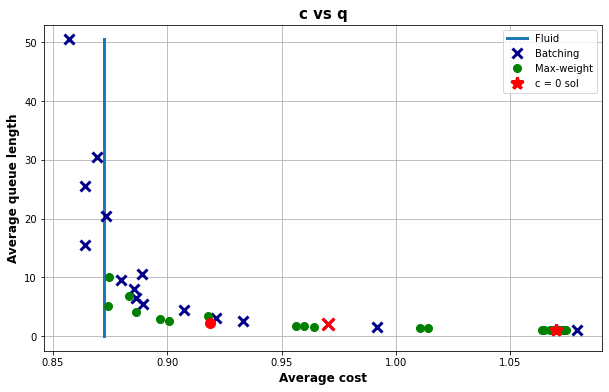

In [56]:
file_name = "../sim_paths_prob_curve13.pkl"
with open(file_name,'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
cM, qM, cB, qB = minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)
plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, cM, qM, cB, qB)

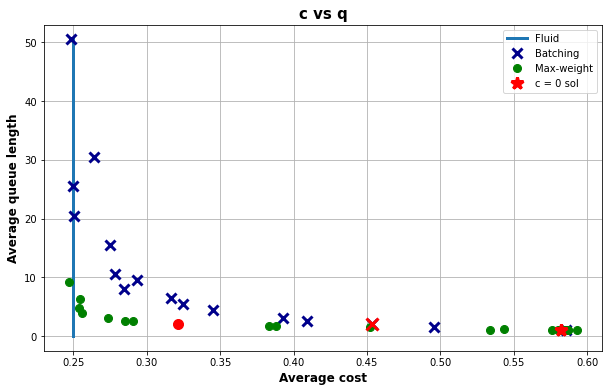

In [41]:
plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, cM, qM, cB, qB)

Acceptable (in terms of minmax working) plots for all 14 (10k steps)

### The actual plot we need: gap vs probab

In [6]:
probs = np.arange(0.05,0.75,0.05)
i = 0
zero_probs = np.zeros(probs.size)
gaps = np.zeros(probs.size)
for p in probs:
    file_name = "../sim_paths_prob_curve" + str(i) + '.pkl'
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    zero_probs[i]  = np.dot(pmf_cust,pmf_serv)
    # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
    # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    cM, qM, cB, qB = minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
    gaps[i] = cB - cM
    i = i+1

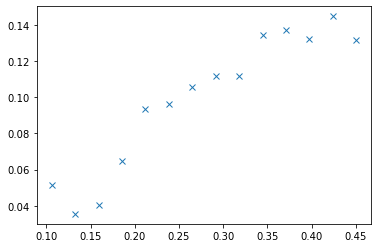

In [8]:
plt.plot(zero_probs,gaps, 'x')

In [83]:
zero_probs

array([0.4505, 0.424 , 0.3975, 0.371 , 0.3445, 0.318 , 0.2915, 0.265 ,
       0.2385, 0.212 , 0.1855, 0.159 , 0.1325, 0.106 ])

In [81]:
gaps

array([0.13179941, 0.14484083, 0.13211606, 0.13743616, 0.13421139,
       0.11184234, 0.1118254 , 0.10549941, 0.0962796 , 0.09356833,
       0.0648127 , 0.04037473, 0.03545665, 0.05170681])

In [9]:
i = 0
zero_probs = np.zeros(13)
gaps = np.zeros(13)
for j in range(9):
    print(i)
    file_name = "../probab_curve_50k/sim_paths_prob_curve" + str(i) + '.pkl'
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    zero_probs[i]  = np.dot(pmf_cust,pmf_serv)
    # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
    # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    cM, qM, cB, qB = minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
    gaps[i] = cB - cM
    i = i+1

0
1
2
3
4
5
6
7
8


In [16]:
for j in range(4):
    print(i)
    file_name = "../probab_curve_50k/sp_prob_curve_right_" + str(j) + '.pkl'
    with open(file_name,'rb') as f:
        M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
    Q_paths_M = M_res["Q_paths"]
    C_paths_M = M_res["C_paths"]
    Q_paths_B = B_res["Q_paths"]
    C_paths_B = B_res["C_paths"]
    zero_probs[i]  = np.dot(pmf_cust,pmf_serv)
    # zero_probs[i] = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
    (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
    # [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    cM, qM, cB, qB = minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)  
    gaps[i] = cB - cM
    i = i+1

9
10
11
12


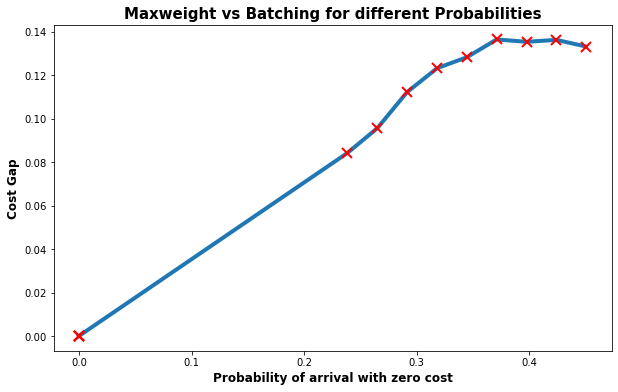

In [28]:
plt.figure( figsize=(10,6) )
plt.plot(zero_probs,gaps,linewidth=4)
plt.plot(zero_probs,gaps,'rx', markersize = 10, markeredgewidth=2)
plt.ylabel("Cost Gap", weight='bold',fontsize=12)
plt.xlabel("Probability of arrival with zero cost", weight='bold',fontsize=12)
plt.title("Maxweight vs Batching for different Probabilities", weight='bold',fontsize=15)
plt.savefig('../../plots_stash/cost-gap.jpg', bbox_inches='tight')
plt.show()

In [19]:
zero_probs

array([0.4505, 0.424 , 0.3975, 0.371 , 0.3445, 0.318 , 0.2915, 0.265 ,
       0.2385, 0.4745, 0.5635, 0.6525, 0.7415])

In [21]:
gaps

array([0.13315724, 0.13622282, 0.13534796, 0.1364185 , 0.1282509 ,
       0.12316989, 0.11224113, 0.0956178 , 0.08422555, 0.03976965,
       0.04919262, 0.06533033, 0.08583871])

Expected cost for c = 0 case: 0.433
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0xb3b41879
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-02, 9e-01]
Presolve removed 2 rows and 5 columns
Presolve time: 0.00s
Presolved: 6 rows, 11 columns, 22 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.1970563e-01   2.000000e-01   0.000000e+00      0s
       4    2.9041631e-01   0.000000e+00   0.000000e+00      0s

Solved in 4 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.904163056e-01
Objective Value: 0.29
x:  [[0.7   0.    0.    0.   ]
 [0.025 0.025 0.    0.   ]
 [0.025 0.    0.025 0.   ]
 

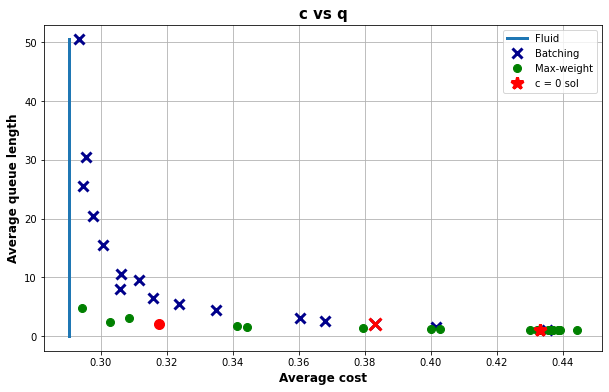

In [29]:
file_name = "../probab_curve_50k/sp_prob_curve_right_2.pkl"
with open(file_name,'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
cM, qM, cB, qB = minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)
plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, cM, qM, cB, qB)

Expected cost for c = 0 case: 0.582
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 8 rows, 16 columns and 32 nonzeros
Model fingerprint: 0x1aec452b
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e-02, 8e-01]
Presolve removed 1 rows and 1 columns
Presolve time: 0.01s
Presolved: 7 rows, 15 columns, 30 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   5.389900e-01   0.000000e+00      0s
       6    2.5000000e-01   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.01 seconds (0.00 work units)
Optimal objective  2.500000000e-01
Objective Value: 0.25
x:  [[0.01 0.   0.04 0.  ]
 [0.   0.1  0.   0.  ]
 [0.   0.   0.1  0.  ]
 [0.   0.1  0

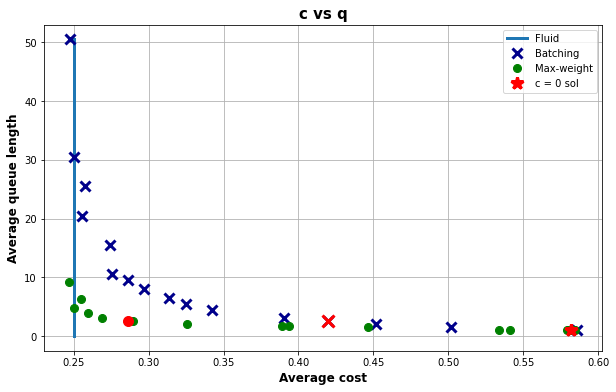

In [27]:
file_name = "../probab_curve_50k/sim_paths_prob_curve" + str(0) + '.pkl'
with open(file_name,'rb') as f:
    M_res,B_res, N, W, pmf_cust, pmf_serv = pickle.load(f)
Q_paths_M = M_res["Q_paths"]
C_paths_M = M_res["C_paths"]
Q_paths_B = B_res["Q_paths"]
C_paths_B = B_res["C_paths"]
(average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M)
(average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B)
[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
cM, qM, cB, qB = minmax(average_cost_M, average_queue_M, average_cost_B, average_queue_B)
plot(Ex,fluid_sol,average_queue_B,average_cost_B,average_queue_M,average_cost_M, cM, qM, cB, qB)